In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------- ------------------ 30.7

In [4]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [5]:
# load the dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are eight input variables and one output variable (the last column). You will be learning a model to map rows of input variables (X) to an output variable (y), which is often summarized as y = f(X).

The variables can be summarized as follows:

`Input Variables (X):`

Number of times pregnant</br>
Plasma glucose concentration at 2 hours in an oral glucose tolerance test</br>
Diastolic blood pressure (mm Hg)</br>
Triceps skin fold thickness (mm)</br>
2-hour serum insulin (mu U/ml)</br>
Body mass index (weight in kg/(height in m)^2)</br>
Diabetes pedigree function</br>
Age (years)</br>

`Output Variables (y):`

Class variable (0 or 1)

In [6]:
# Splitting the data
array = df.values

X = array[:,0:8]
y = array[:,8]

In [7]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the keras model on the dataset
history = model.fit(X, y, epochs=50
                    , batch_size=50)

Epoch 1/50


16/16 [==============================] - 3s 5ms/step - loss: 10.8776 - accuracy: 0.3529
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 4.7585 - accuracy: 0.3529
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 1.9778 - accuracy: 0.4883
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 1.5378 - accuracy: 0.4661
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 1.1994 - accuracy: 0.4544
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9346 - accuracy: 0.5404
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7897 - accuracy: 0.5755
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7316 - accuracy: 0.5977
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.6211
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.6315
Epoch 11/50
16/1

In [10]:
# Evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 1s 3ms/step - loss: 0.5637 - accuracy: 0.7083
Accuracy: 70.83


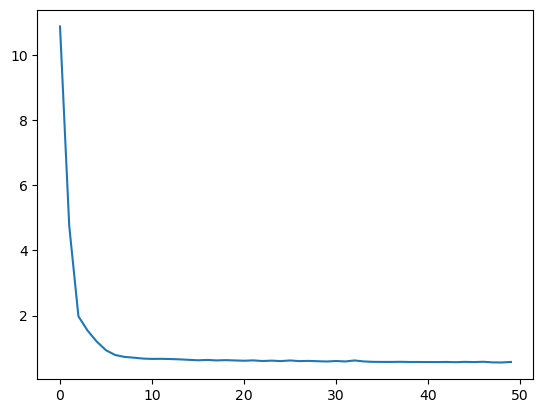

In [11]:
# Convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# Use Pandas native plot method
history_df['loss'].plot();

In [12]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 3ms/step


In [13]:
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), rounded[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


# TODO

- `Tune the Model.` Change the configuration of the model or training process and see if you can improve the performance of the model

- `Save the Model.` Update the tutorial to save the model to a file, then load it later and use it to make predictions

- `Separate, Train, and Test Datasets.` Split the loaded dataset into a training and test set and use one set to train the model and the other set to estimate the performance of the model on new data.

- `Learn a New Dataset.` Update the tutorial to use a different tabular dataset, perhaps from the UCI Machine Learning Repository.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [15]:
# pip install keras --upgrade

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [17]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Function to create a Keras model with variable hyperparameters
def create_model(optimizer='adam', hidden_layer_size=32):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the hyperparameters to tune
param_grid = {
    'epochs': [100, 200],
    'batch_size': [10, 20],
    'optimizer': ['adam', 'rmsprop'],
    'hidden_layer_size': [32, 64]
}

best_score = 0
best_params = {}

# Iterate through each hyperparameter combination
for epochs in param_grid['epochs']:
    for batch_size in param_grid['batch_size']:
        for optimizer in param_grid['optimizer']:
            for hidden_layer_size in param_grid['hidden_layer_size']:
                # Create model with specific hyperparameters
                model = create_model(optimizer=optimizer, hidden_layer_size=hidden_layer_size)
                
                # Train the model
                model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                
                # Evaluate the model
                score = model.evaluate(x_test, y_test, verbose=0)[1]
                
                # Check if current model's score is better than the previous best
                if score > best_score:
                    best_score = score
                    best_params = {
                        'epochs': epochs,
                        'batch_size': batch_size,
                        'optimizer': optimizer,
                        'hidden_layer_size': hidden_layer_size
                    }

# Print the best results
print("Best score:", best_score)
print("Best parameters:", best_params)


Best score: 0.7316017150878906
Best parameters: {'epochs': 200, 'batch_size': 10, 'optimizer': 'rmsprop', 'hidden_layer_size': 32}


In [18]:
import joblib

In [19]:
model = create_model()
model.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])


Epoch 1/200
54/54 [==============================] - 2s 4ms/step - loss: 9.3852 - accuracy: 0.4749
Epoch 2/200
54/54 [==============================] - 0s 4ms/step - loss: 1.8276 - accuracy: 0.5475
Epoch 3/200
54/54 [==============================] - 0s 4ms/step - loss: 1.3612 - accuracy: 0.6108
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 1.1707 - accuracy: 0.5922
Epoch 5/200
54/54 [==============================] - 0s 4ms/step - loss: 1.1270 - accuracy: 0.6164
Epoch 6/200
54/54 [==============================] - 0s 4ms/step - loss: 1.0423 - accuracy: 0.6294
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 0.9767 - accuracy: 0.6145
Epoch 8/200
54/54 [==============================] - 0s 4ms/step - loss: 0.8789 - accuracy: 0.6406
Epoch 9/200
54/54 [==============================] - 0s 4ms/step - loss: 0.9143 - accuracy: 0.6071
Epoch 10/200
54/54 [==============================] - 0s 4ms/step - loss: 0.8002 - accuracy: 0.6592
Epoch 11/

54/54 [==============================] - 0s 6ms/step - loss: 0.5094 - accuracy: 0.7616
Epoch 84/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5098 - accuracy: 0.7356
Epoch 85/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5333 - accuracy: 0.7356
Epoch 86/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5300 - accuracy: 0.7263
Epoch 87/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5409 - accuracy: 0.7095
Epoch 88/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.7654
Epoch 89/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5078 - accuracy: 0.7467
Epoch 90/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5190 - accuracy: 0.7486
Epoch 91/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5711 - accuracy: 0.7393
Epoch 92/200
54/54 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7263
Epoch 93/200


54/54 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7635
Epoch 165/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7896
Epoch 166/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7765
Epoch 167/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7672
Epoch 168/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.7821
Epoch 169/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7840
Epoch 170/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7709
Epoch 171/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7505
Epoch 172/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5190 - accuracy: 0.7616
Epoch 173/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7952
Epoc

In [20]:
joblib.dump(model, 'sequential_model.joblib')

['sequential_model.joblib']